In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path

In [3]:
from dataset_exploration.dataset_statistics import (
    statistics,
    analyze_distribution,
    analyze_bounding_boxes,
    get_config,
    get_dataloader,
)

In [4]:
# Load config
config_path = "../configs/tdt4265.py"
cfg = get_config(config_path)

It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/mariueng
	If you struggle with NTNU home directory becoming full, we recommend you to change the output directory to: /work/snotra/mariueng
	 /work/snotra/mariueng does not sync with NTNU HOME, and is a directory only located on the server.
	 To change the output directory of SSD, set save_in_work to True in the file configs/utils.py, in the function get_output_dir.
Saving SSD outputs to: outputs/
Found dataset directory in: /work/datasets/mnist_object_detection/train
Found dataset directory in: /work/datasets/mnist_object_detection/val
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json


In [5]:
label_map = cfg.label_map
print(f"Label map is: {label_map}")

Label map is: {0: 'background', 1: 'car', 2: 'truck', 3: 'bus', 4: 'motorcycle', 5: 'bicycle', 6: 'scooter', 7: 'person', 8: 'rider'}


In [6]:
# Get dataloader
dataset_to_analyze = "train"
dataloader_train = get_dataloader(cfg, dataset_to_analyze)

/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
import matplotlib.pyplot as plt
import torch

In [8]:
data = next(iter(dataloader_train))

In [9]:
data.keys()

dict_keys(['image', 'boxes', 'labels', 'width', 'height', 'image_id'])

In [10]:
next_image = next(iter(dataloader_train))
print(f"Feature batch shape: {next_image['image'].size()}")
print(f"Labels batch shape: {next_image['labels'].size()}")

Feature batch shape: torch.Size([1, 3, 128, 1024])
Labels batch shape: torch.Size([1, 14])


Shape: torch.Size([128, 1024, 3])


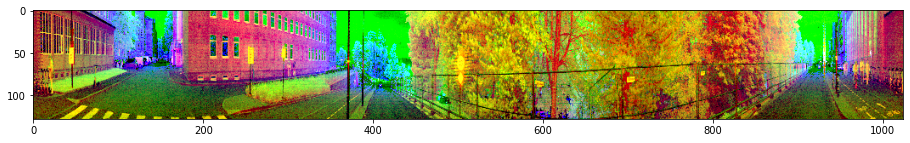

In [11]:
# Display image and label.
img = next_image['image'][0]
im2display = img.permute(1, 2, 0)
print(f'Shape: {im2display.shape}')
label = next_image['labels'][0]
fig, ax = plt.subplots(figsize=(18, 2))
ax.imshow(im2display, cmap="gray")

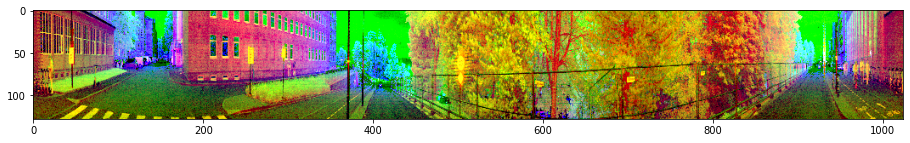

In [12]:
img = next_image['image'][0]
label = next_image['labels'][0]
fig, ax = plt.subplots(figsize=(18, 2))
ax.imshow(img.permute(1, 2, 0), cmap="gray")

In [10]:
statistics(dataloader, cfg)

ConfigAttributeError: Missing key INPUT
    full_key: INPUT
    object_type=dict